In [41]:
#a the date set collected from UC
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [43]:
colm=['id', 'clump_thickness', 'uni_cell_size', 'uni_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
df= pd.read_csv('breast-cancer-wisconsin.data', names=colm)

In [44]:
df.head()

,id,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [45]:
df.shape

(699, 11)

In [46]:
df.describe()

,id,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uni_cell_size           699 non-null    int64 
 3   uni_cell_shape          699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [48]:
# drop Id column 
df.drop("id", axis=1, inplace = True)

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'uni_cell_size'}>,
        <AxesSubplot:title={'center':'uni_cell_shape'}>],
       [<AxesSubplot:title={'center':'marg_adhesion'}>,
        <AxesSubplot:title={'center':'single_epith_cell_size'}>,
        <AxesSubplot:title={'center':'bland_chrom'}>],
       [<AxesSubplot:title={'center':'norm_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

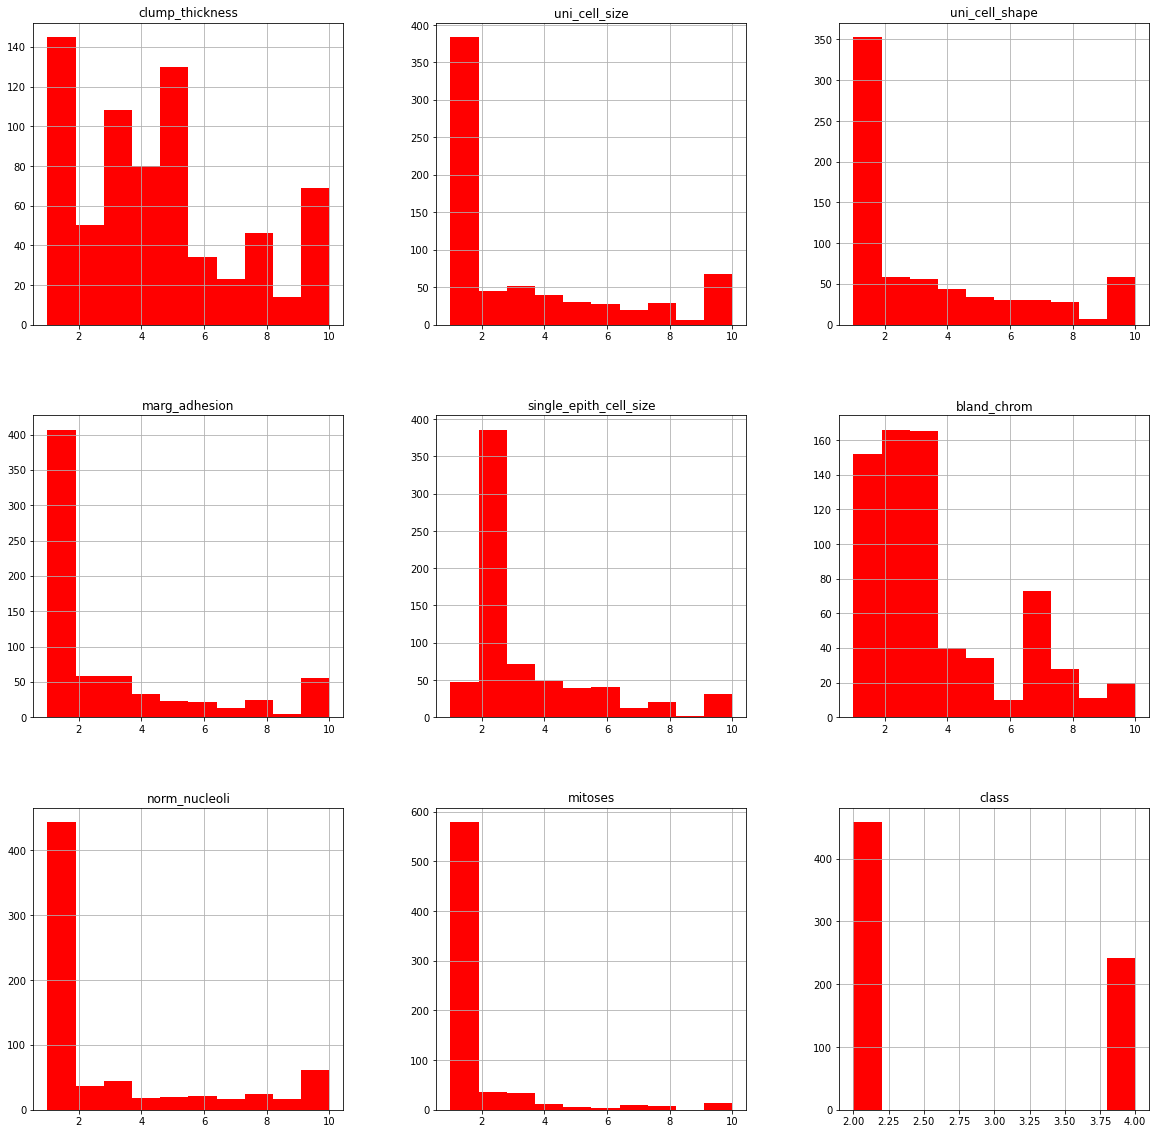

In [49]:
df.hist(bins=10, figsize=(20,20), color='r')

<AxesSubplot:>

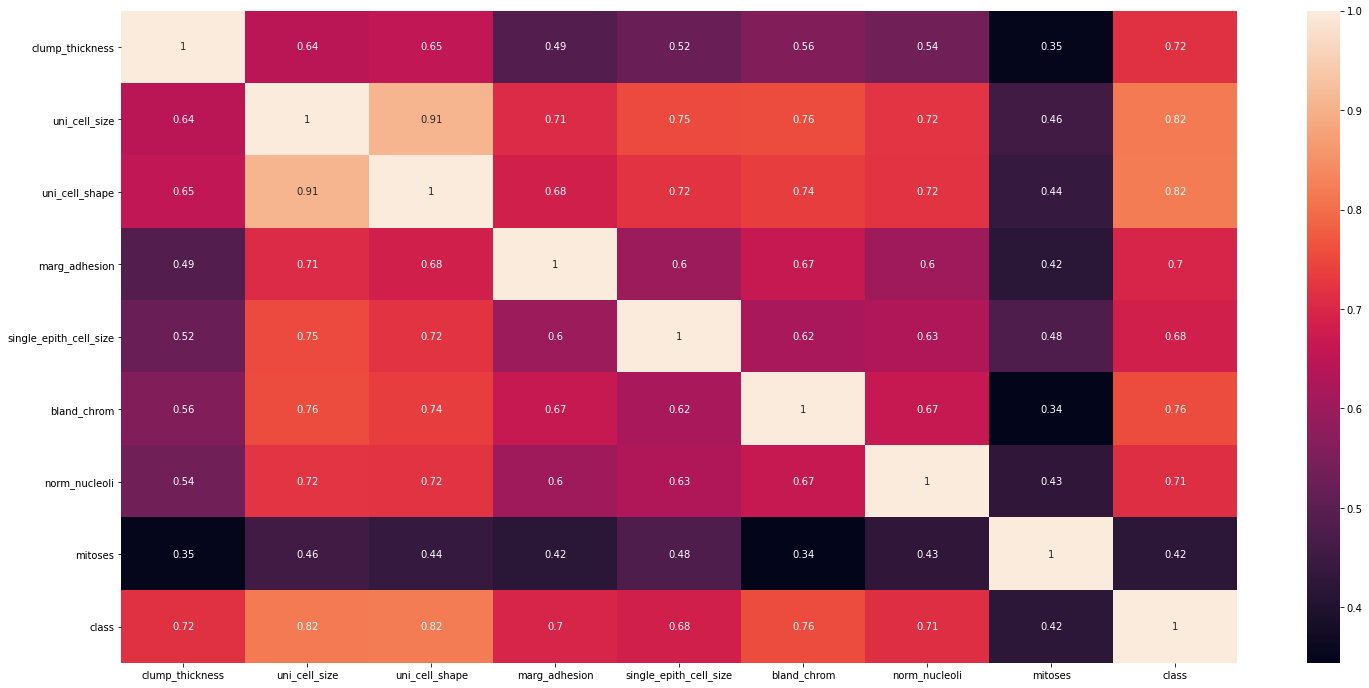

In [50]:
#checking the corelations
corelations= df.corr()
#fig, ax= plt.subplots(figsize=(10,10))
plt.figure(figsize=[25, 12])
sns.heatmap(corelations, annot= True)

<AxesSubplot:>

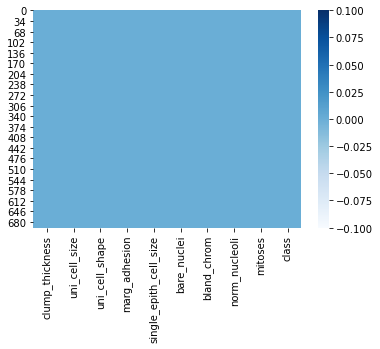

In [51]:
# lets see any missing values 

sns.heatmap(df.isnull(), cmap= "Blues")

<AxesSubplot:>

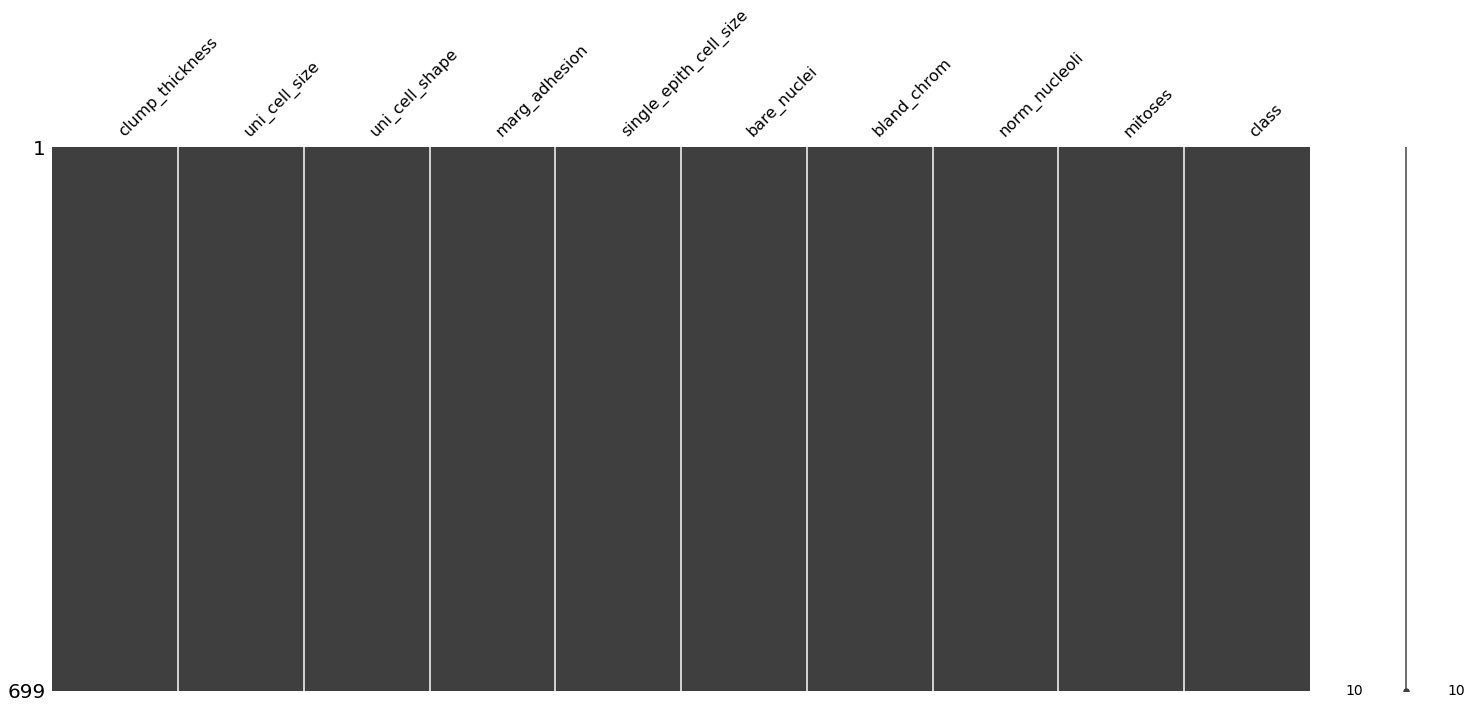

In [52]:
#! pip install missingno
import  missingno as msno 
msno.matrix(df)

Data Cleaning 

In [61]:
df.isin(["?"]).sum()
# at last I found it 

clump_thickness           0
uni_cell_size             0
uni_cell_shape            0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
class                     0
dtype: int64

In [62]:
#df.replace("?", np.nan, inplace= True)
df.replace("?", 0, inplace= True)

In [63]:
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
#mean = df["bare_nuclei"].mean()
#df["bare_nuclei"].fillna(mean, inplace=True)
#this column has Object type dataset so need to casting 

In [64]:
df["bare_nuclei"].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [65]:
#https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
df['bare_nuclei']=df['bare_nuclei'].astype(int)

In [66]:
df['bare_nuclei'].dtypes

dtype('int32')

In [67]:
df.replace(0, np.median(df['bare_nuclei']), inplace= True)

In [68]:
print( df["bare_nuclei"].unique())

[ 1 10  2  4  3  9  7  5  8  6]


In [69]:
df.info()
# ok perfect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uni_cell_size           699 non-null    int64
 2   uni_cell_shape          699 non-null    int64
 3   marg_adhesion           699 non-null    int64
 4   single_epith_cell_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int32
 6   bland_chrom             699 non-null    int64
 7   norm_nucleoli           699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


now go for apply Algorithm

In [71]:
#seperate the training set 
X= df.drop('class', axis= 1)
X.shape

(699, 9)

In [72]:
#seperate target variable
y= df[['class']]
y.shape

(699, 1)

In [73]:
# I try to apply LOgistic regression here 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [88]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, stratify=y)

In [89]:


steps= [( "scaling",StandardScaler() ), ("classifier",LogisticRegression() ) ]

In [90]:
pipeline= Pipeline(steps)

In [116]:
#Logistic regression does not really have any critical hyperparameters to tune
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
parameter= {'classifier__C' :np.logspace(-5, 8, 15) ,'classifier__penalty': ['l2']}

In [117]:
cv = RandomizedSearchCV(pipeline, param_distributions= parameter ,cv=7)

In [118]:
cv.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('classifier',
                                              LogisticRegression())]),
                   param_distributions={'classifier__C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                                        'classifier__penalty': ['l2']})

In [119]:
y_pred= cv.predict(X_test)

In [120]:
print(cv.best_params_)

{'classifier__penalty': 'l2', 'classifier__C': 268.2695795279727}


In [122]:
print(cv.best_score_)

0.9714285714285715


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       138
           4       0.96      0.90      0.93        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.95       210
weighted avg       0.95      0.95      0.95       210



In [129]:
roc_auc_score(y_test, y_pred)

0.9405193236714975

In [130]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       138
           4       0.96      0.90      0.93        72

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.95       210
weighted avg       0.95      0.95      0.95       210



Plottig ROC Curve

In [148]:
y_pred_prob = cv.predict_proba(X_test)[:,1]


In [149]:
y_pred_prob.shape

(210,)

In [152]:
#from sklearn.metrics import roc_curve

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)




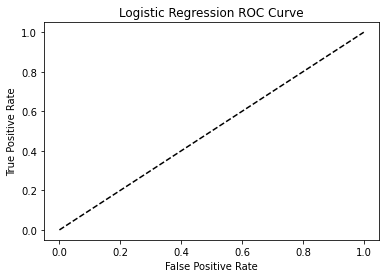

In [151]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();